# Read Dataset and Get Characteristics

In [1]:
import networkx as nx
from networkx.algorithms.centrality import *
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sns
from scipy.stats import kendalltau

# For EoN
import math
import EoN
import matplotlib.pyplot as plt
from outilsForProject import *
from statistics import stdev, mean
import numpy as np
from math import sqrt

In [2]:
#First, read it in as a normal dataframe
import pandas as pd
df = pd.read_csv(r".\eu_airlines\edges.csv")
df.head()

,# source,target,weight,layer
0,0,1,1,1
1,0,37,1,1
2,0,251,1,3
3,0,70,1,4
4,0,63,1,14


In [3]:
df = df.iloc[:, 0:2]
df.rename(columns={'# source':'s', ' target':'t'}, inplace=True)
df

,s,t
0,0,1
1,0,37
2,0,251
3,0,70
4,0,63
...,...,...
3583,383,396
3584,385,413
3585,409,420
3586,435,444


In [4]:
#Convert it to a graph
#Each row is an edge with a source and a target. The network will automatically create nodes for you based on their names.
g = nx.from_pandas_edgelist(df, source='s', target='t')
print(nx.info(g))

Graph with 417 nodes and 2953 edges


In [5]:
g = g.to_undirected()

In [6]:
#Get Simple Graph
#Remove self-loops

g.remove_edges_from(nx.selfloop_edges(g))
print(nx.info(g))

Graph with 417 nodes and 2953 edges


# Check connectedness

In [7]:
nx.is_connected(g)

True

In [8]:
nx.number_connected_components(g)

1

# Relabel it all if nodes are strings
- To be able to run all types of correlation together
- But put the graph relabled in `g_relabled`

In [9]:
from myTruss import mappingAndRelabeling

In [10]:
g_relabled = mappingAndRelabeling(g)

In [11]:
"""Before""" 
#print(g.nodes())

'Before'

In [12]:
"""After""" 
#print(g_relabled.nodes())

'After'

In [13]:
"""Before""" 
print(nx.info(g))

Graph with 417 nodes and 2953 edges


In [14]:
"""Before""" 
print(nx.info(g_relabled))

Graph with 417 nodes and 2953 edges


In [15]:
g = g_relabled

# Modular Centrality 1: Comm Centrality

In [16]:
# Read Centrality
dict_com_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_com.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_com_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [17]:
dict_com_read[1]

19.562082783601774

# Modular Centrality 2: CBM - Community-based Mediator

In [18]:
# Read Centrality
dict_cbm_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_cbm.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_cbm_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [19]:
dict_cbm_read[1]

0.0012931880450018501

# Modular Centrality 3: Community Hub-Bridge centrality

In [20]:
# Read Centrality
dict_chb_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_chb.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_chb_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [21]:
dict_chb_read[0]

0.7961630695443646

# Modular Centrality 4: K-shell with community centrality

In [22]:
# Read Centrality
dict_kshell_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_kshell.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_kshell_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [23]:
dict_kshell_read[1]

13.5

# Modular Centrality 5: Community Based Centrality

In [24]:
# Read Centrality
dict_cbc_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_cbc.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_cbc_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [25]:
dict_cbc_read[1]

66.58273381294957

# Modular Centrality 6: Participation Coefficient

In [26]:
# Read Centrality
dict_pc_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines/dict_pc.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_pc_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [27]:
dict_pc_read[1]

0.1649559231976815

# Modular Centrality 7: Mod Vitality

In [28]:
# Read Centrality
dict_modv_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_original_modv.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_modv_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [29]:
dict_modv_read[1]

-0.0034346499624277743

# Degree Centrality (Reference)

In [30]:
# Read Centrality
dict_degree_read = dict()
with open(r'.\CentralityResults\Infra-EUAirlines\dict_degree.txt') as raw_data:
    for item in raw_data:
        if ':' in item:
            key,value = item.split(':', 1)
            value = value.replace('\n', '')
            dict_degree_read[int(key)]=float(value)
        else:
            pass # deal with bad lines of text here

In [31]:
dict_degree_read[0]

0.03125

# Convert all centrality values to ranks

In [32]:
import collections
import heapq
import operator

# Returns a list of the top_k nodes and their centralities, and heap (list) of top k nodes --> heap will be used for removal
def get_top_k_best_nodes(dict_centrality, k):
    
    # The sorted() function returns a sorted list of the specified iterable object
    top_k = sorted(dict_centrality.items(), key=operator.itemgetter(1), reverse=True)[:k]
    first_nodes = heapq.nlargest(k, dict_centrality, key=dict_centrality.get)
    
    return top_k, first_nodes

In [33]:
# Returns a list of the bottom_k nodes and their centralities, and heap (list) of top k nodes --> heap will be used for removal
def get_bottom_k_best_nodes(dict_centrality, k):
    
    # The sorted() function returns a sorted list of the specified iterable object
    bottom_k = sorted(dict_centrality.items(), key=operator.itemgetter(1))[:k]
    bottom_nodes = heapq.nsmallest(k, dict_centrality, key=dict_centrality.get)
    
    return bottom_k, bottom_nodes

In [34]:
fraction = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20,0.21,
           0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40,
           0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50]

In [35]:
network_size = len(g.nodes())

# Fraction of initial spreaders

In [36]:
fraction = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20,0.21,
           0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40,
           0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50]


mixed_comm_average_each_simulation = dict()
mixed_comm_stdv_each_simulation = dict()

mixed_cbm_average_each_simulation = dict()
mixed_cbm_stdv_each_simulation = dict()

mixed_chb_average_each_simulation = dict()
mixed_chb_stdv_each_simulation = dict()

mixed_kshell_average_each_simulation = dict()
mixed_kshell_stdv_each_simulation = dict()

mixed_cbc_average_each_simulation = dict()
mixed_cbc_stdv_each_simulation = dict()

mixed_pc_average_each_simulation = dict()
mixed_pc_stdv_each_simulation = dict()

mixed_original_modv_average_each_simulation = dict()
mixed_original_modv_stdv_each_simulation = dict()

degree_average_each_simulation = dict()
degree_stdv_each_simulation = dict()



for p in fraction:
    mixed_comm_average_each_simulation[p] = 0
    mixed_comm_stdv_each_simulation[p] = 0

    mixed_cbm_average_each_simulation[p] = 0
    mixed_cbm_stdv_each_simulation[p] = 0

    mixed_chb_average_each_simulation[p] = 0
    mixed_chb_stdv_each_simulation[p] = 0

    mixed_kshell_average_each_simulation[p] = 0
    mixed_kshell_stdv_each_simulation[p] = 0

    mixed_cbc_average_each_simulation[p] = 0
    mixed_cbc_stdv_each_simulation[p] = 0

    mixed_pc_average_each_simulation[p] = 0
    mixed_pc_stdv_each_simulation[p] = 0

    mixed_original_modv_average_each_simulation[p] = 0
    mixed_original_modv_stdv_each_simulation[p] = 0
    
    degree_average_each_simulation[p] = 0
    degree_stdv_each_simulation[p] = 0

# SIR parameters

In [37]:
tau = 0.024
gamma = 0.1  # recovery rate
repeatSimulations = 100 # repeatSimulations represents how many times we want to repeat the SIR model

# Run SIR with Degree (Reference)

In [38]:
for p in fraction:   
    # Step 1: Get the nodes to be infected
    percentage_to_infect = round(p*network_size)
    x_top_degree, y_top_degree = get_top_k_best_nodes(dict_degree_read, percentage_to_infect)
    infected_nodes = y_top_degree

    
    # Step 4: Apply SIR
    l_degree = list()

    for i in range(repeatSimulations):
        t2, S2, I2, R2 = EoN.fast_SIR(g, tau, gamma, initial_infecteds = infected_nodes)
        finalRecoveredInOneIteration = numberOfRecoveredNodes(R2)
        l_degree.append(finalRecoveredInOneIteration)

    degree_average_each_simulation[p] = mean(l_degree)
    degree_stdv_each_simulation[p] = stdev(l_degree)

In [39]:
# Convert degree_average_each_simulation to list
degree_average_each_simulation_list = []
for i in degree_average_each_simulation.values():
    degree_average_each_simulation_list.append(i)

In [40]:
# Convert to list and percentage of the network
degree_average_each_simulation_list_percentages = []
for i in degree_average_each_simulation_list:
    degree_average_each_simulation_list_percentages.append((i/network_size)*100)

In [41]:
# Convert degree_stdv_each_simulation to list
degree_stdv_each_simulation_list = []
for i in degree_stdv_each_simulation.values():
    degree_stdv_each_simulation_list.append(round(i, 3))

In [42]:
# Convert to list and percentage of the network
degree_stdv_each_simulation_list_percentages = []
for i in degree_stdv_each_simulation_list:
    degree_stdv_each_simulation_list_percentages.append((i/network_size)*100)

# Run SIR with mixed

## Comm Centrality

In [43]:
for p in fraction:   
    percentage_to_infect = round(p*network_size)
    x_top_degree, y_top_degree = get_top_k_best_nodes(dict_com_read, percentage_to_infect)
    infected_nodes = y_top_degree

    
    l_degree = list()

    for i in range(repeatSimulations):
        t2, S2, I2, R2 = EoN.fast_SIR(g, tau, gamma, initial_infecteds = infected_nodes)
        finalRecoveredInOneIteration = numberOfRecoveredNodes(R2)
        # print('Iteration in one fraction: ', i, 'Fraction infected: ', fraction, 'Number recovered: ', finalRecoveredInOneIteration)
        l_degree.append(finalRecoveredInOneIteration)
        

    mixed_comm_average_each_simulation[p] = mean(l_degree)
    mixed_comm_stdv_each_simulation[p] = stdev(l_degree)

In [44]:
mixed_comm_average_each_simulation_list = []
for i in mixed_comm_average_each_simulation.values():
    mixed_comm_average_each_simulation_list.append(i)

In [45]:
mixed_comm_average_each_simulation_list_percentages = []
for i in mixed_comm_average_each_simulation_list:
    mixed_comm_average_each_simulation_list_percentages.append((i/network_size)*100)

In [46]:
mixed_comm_stdv_each_simulation_list = []
for i in mixed_comm_stdv_each_simulation.values():
    mixed_comm_stdv_each_simulation_list.append(round(i, 3))

In [47]:
mixed_comm_stdv_each_simulation_list_percentages = []
for i in mixed_comm_stdv_each_simulation_list:
    mixed_comm_stdv_each_simulation_list_percentages.append((i/network_size)*100)

## CBM Centrality

In [48]:
for p in fraction:   
    percentage_to_infect = round(p*network_size)
    x_top_degree, y_top_degree = get_top_k_best_nodes(dict_cbm_read, percentage_to_infect)
    infected_nodes = y_top_degree

    
    l_degree = list()

    for i in range(repeatSimulations):
        t2, S2, I2, R2 = EoN.fast_SIR(g, tau, gamma, initial_infecteds = infected_nodes)
        finalRecoveredInOneIteration = numberOfRecoveredNodes(R2)
        # print('Iteration in one fraction: ', i, 'Fraction infected: ', fraction, 'Number recovered: ', finalRecoveredInOneIteration)
        l_degree.append(finalRecoveredInOneIteration)


    mixed_cbm_average_each_simulation[p] = mean(l_degree)
    mixed_cbm_stdv_each_simulation[p] = stdev(l_degree)

In [49]:
mixed_cbm_average_each_simulation_list = []
for i in mixed_cbm_average_each_simulation.values():
    mixed_cbm_average_each_simulation_list.append(i)

In [50]:
mixed_cbm_average_each_simulation_list_percentages = []
for i in mixed_cbm_average_each_simulation_list:
    mixed_cbm_average_each_simulation_list_percentages.append((i/network_size)*100)

In [51]:
mixed_cbm_stdv_each_simulation_list = []
for i in mixed_cbm_stdv_each_simulation.values():
    mixed_cbm_stdv_each_simulation_list.append(round(i, 3))

In [52]:
mixed_cbm_stdv_each_simulation_list_percentages = []
for i in mixed_cbm_stdv_each_simulation_list:
    mixed_cbm_stdv_each_simulation_list_percentages.append((i/network_size)*100)

## CHB Centrality

In [53]:
for p in fraction:   
    percentage_to_infect = round(p*network_size)
    x_top_degree, y_top_degree = get_top_k_best_nodes(dict_chb_read, percentage_to_infect)
    infected_nodes = y_top_degree

    
    l_degree = list()

    for i in range(repeatSimulations):
        t2, S2, I2, R2 = EoN.fast_SIR(g, tau, gamma, initial_infecteds = infected_nodes)
        finalRecoveredInOneIteration = numberOfRecoveredNodes(R2)
        # print('Iteration in one fraction: ', i, 'Fraction infected: ', fraction, 'Number recovered: ', finalRecoveredInOneIteration)
        l_degree.append(finalRecoveredInOneIteration)
        
    mixed_chb_average_each_simulation[p] = mean(l_degree)
    mixed_chb_stdv_each_simulation[p] = stdev(l_degree)

In [54]:
mixed_chb_average_each_simulation_list = []
for i in mixed_chb_average_each_simulation.values():
    mixed_chb_average_each_simulation_list.append(i)

In [55]:
mixed_chb_average_each_simulation_list_percentages = []
for i in mixed_chb_average_each_simulation_list:
    mixed_chb_average_each_simulation_list_percentages.append((i/network_size)*100)

In [56]:
mixed_chb_stdv_each_simulation_list = []
for i in mixed_chb_stdv_each_simulation.values():
    mixed_chb_stdv_each_simulation_list.append(round(i, 3))

In [57]:
mixed_chb_stdv_each_simulation_list_percentages = []
for i in mixed_chb_stdv_each_simulation_list:
    mixed_chb_stdv_each_simulation_list_percentages.append((i/network_size)*100)

## Kshell Centrality

In [58]:
for p in fraction:   
    percentage_to_infect = round(p*network_size)
    x_top_degree, y_top_degree = get_top_k_best_nodes(dict_kshell_read, percentage_to_infect)
    infected_nodes = y_top_degree

    
    l_degree = list()

    for i in range(repeatSimulations):
        t2, S2, I2, R2 = EoN.fast_SIR(g, tau, gamma, initial_infecteds = infected_nodes)
        finalRecoveredInOneIteration = numberOfRecoveredNodes(R2)
        # print('Iteration in one fraction: ', i, 'Fraction infected: ', fraction, 'Number recovered: ', finalRecoveredInOneIteration)
        l_degree.append(finalRecoveredInOneIteration)


    mixed_kshell_average_each_simulation[p] = mean(l_degree)
    mixed_kshell_stdv_each_simulation[p] = stdev(l_degree)

In [59]:
mixed_kshell_average_each_simulation_list = []
for i in mixed_kshell_average_each_simulation.values():
    mixed_kshell_average_each_simulation_list.append(i)

In [60]:
mixed_kshell_average_each_simulation_list_percentages = []
for i in mixed_kshell_average_each_simulation_list:
    mixed_kshell_average_each_simulation_list_percentages.append((i/network_size)*100)

In [61]:
mixed_kshell_stdv_each_simulation_list = []
for i in mixed_kshell_stdv_each_simulation.values():
    mixed_kshell_stdv_each_simulation_list.append(round(i, 3))

In [62]:
mixed_kshell_stdv_each_simulation_list_percentages = []
for i in mixed_kshell_stdv_each_simulation_list:
    mixed_kshell_stdv_each_simulation_list_percentages.append((i/network_size)*100)

## CBC Centrality

In [63]:
for p in fraction:   
    percentage_to_infect = round(p*network_size)
    x_top_degree, y_top_degree = get_top_k_best_nodes(dict_cbc_read, percentage_to_infect)
    infected_nodes = y_top_degree

    
    l_degree = list()

    for i in range(repeatSimulations):
        t2, S2, I2, R2 = EoN.fast_SIR(g, tau, gamma, initial_infecteds = infected_nodes)
        finalRecoveredInOneIteration = numberOfRecoveredNodes(R2)
        # print('Iteration in one fraction: ', i, 'Fraction infected: ', fraction, 'Number recovered: ', finalRecoveredInOneIteration)
        l_degree.append(finalRecoveredInOneIteration)


    mixed_cbc_average_each_simulation[p] = mean(l_degree)
    mixed_cbc_stdv_each_simulation[p] = stdev(l_degree)

In [64]:
# Convert degree_average_each_simulation to list
mixed_cbc_average_each_simulation_list = []
for i in mixed_cbc_average_each_simulation.values():
    mixed_cbc_average_each_simulation_list.append(i)
mixed_cbc_average_each_simulation_list

[253,
 252,
 256,
 255,
 253,
 254,
 251,
 256,
 249,
 255,
 255,
 253,
 252,
 251,
 252,
 255,
 254,
 253,
 254,
 251,
 253,
 254,
 258,
 255,
 255,
 258,
 259,
 254,
 258,
 255,
 256,
 254,
 259,
 258,
 258,
 263,
 263,
 260,
 263,
 267,
 267,
 265,
 268,
 267,
 270,
 271,
 273,
 269,
 274,
 276]

In [65]:
mixed_cbc_average_each_simulation_list_percentages = []
for i in mixed_cbc_average_each_simulation_list:
    mixed_cbc_average_each_simulation_list_percentages.append((i/network_size)*100)

In [66]:
mixed_cbc_stdv_each_simulation_list = []
for i in mixed_cbc_stdv_each_simulation.values():
    mixed_cbc_stdv_each_simulation_list.append(round(i, 3))

In [67]:
mixed_cbc_stdv_each_simulation_list_percentages = []
for i in mixed_cbc_stdv_each_simulation_list:
    mixed_cbc_stdv_each_simulation_list_percentages.append((i/network_size)*100)

## PC Centrality

In [68]:
for p in fraction:   
    percentage_to_infect = round(p*network_size)
    x_top_degree, y_top_degree = get_top_k_best_nodes(dict_pc_read, percentage_to_infect)
    infected_nodes = y_top_degree

    
    l_degree = list()

    for i in range(repeatSimulations):
        t2, S2, I2, R2 = EoN.fast_SIR(g, tau, gamma, initial_infecteds = infected_nodes)
        finalRecoveredInOneIteration = numberOfRecoveredNodes(R2)
        # print('Iteration in one fraction: ', i, 'Fraction infected: ', fraction, 'Number recovered: ', finalRecoveredInOneIteration)
        l_degree.append(finalRecoveredInOneIteration)
        

    mixed_pc_average_each_simulation[p] = mean(l_degree)
    mixed_pc_stdv_each_simulation[p] = stdev(l_degree)

In [69]:
mixed_pc_average_each_simulation_list = []
for i in mixed_pc_average_each_simulation.values():
    mixed_pc_average_each_simulation_list.append(i)

In [70]:
mixed_pc_average_each_simulation_list_percentages = []
for i in mixed_pc_average_each_simulation_list:
    mixed_pc_average_each_simulation_list_percentages.append((i/network_size)*100)

In [71]:
mixed_pc_stdv_each_simulation_list = []
for i in mixed_pc_stdv_each_simulation.values():
    mixed_pc_stdv_each_simulation_list.append(round(i, 3))

In [72]:
mixed_pc_stdv_each_simulation_list_percentages = []
for i in mixed_pc_stdv_each_simulation_list:
    mixed_pc_stdv_each_simulation_list_percentages.append((i/network_size)*100)

## Mod Vitality - Positive to negative

In [73]:
dict_original_modv = dict_modv_read

In [74]:
for p in fraction:   
    percentage_to_infect = round(p*network_size)
    x_top_degree, y_top_degree = get_top_k_best_nodes(dict_original_modv, percentage_to_infect)
    infected_nodes = y_top_degree

    
    l_degree = list()

    for i in range(repeatSimulations):
        t2, S2, I2, R2 = EoN.fast_SIR(g, tau, gamma, initial_infecteds = infected_nodes)
        finalRecoveredInOneIteration = numberOfRecoveredNodes(R2)
        # print('Iteration in one fraction: ', i, 'Fraction infected: ', fraction, 'Number recovered: ', finalRecoveredInOneIteration)
        l_degree.append(finalRecoveredInOneIteration)
        

    mixed_original_modv_average_each_simulation[p] = mean(l_degree)
    mixed_original_modv_stdv_each_simulation[p] = stdev(l_degree)

In [75]:
mixed_original_modv_average_each_simulation_list = []
for i in mixed_original_modv_average_each_simulation.values():
    mixed_original_modv_average_each_simulation_list.append(i)

In [76]:
mixed_original_modv_average_each_simulation_list_percentages = []
for i in mixed_original_modv_average_each_simulation_list:
    mixed_original_modv_average_each_simulation_list_percentages.append((i/network_size)*100)

In [77]:
mixed_original_modv_stdv_each_simulation_list = []
for i in mixed_original_modv_stdv_each_simulation.values():
    mixed_original_modv_stdv_each_simulation_list.append(round(i, 3))

In [78]:
mixed_original_modv_stdv_each_simulation_list_percentages = []
for i in mixed_original_modv_stdv_each_simulation_list:
    mixed_original_modv_stdv_each_simulation_list_percentages.append((i/network_size)*100)

#  $\Delta$ R with STDV All Centralities
$\Delta r = \frac{R_c - R_b}{R_b}$

where $R_c$ is the final number of recovered nodes with current method under test and $R_b$ is the final number of recovered nodes with the baseline (reference) method  

In [79]:
def getDeltaRList(current_listR, reference_listR, fraction):
    # current_listR and reference_listR are supposed to be already in percentages
    deltaR = []
    x = range(len(fraction)) # go through the 50 values
    for n in x:
        current_method_value = current_listR[n]
        ref_value = reference_listR[n]
        val = current_method_value - ref_value
        deltaR.append(val)
    return deltaR

In [80]:
def getDeltaRStdvList(current_listRStdv, reference_listRStdv, fraction):
    # current_listR and reference_listR are supposed to be already in percentages
    deltaR_stdv = []
    maxy = len(fraction)
    x = range(len(fraction))
    for n in x:
        current_method_value = current_listRStdv[n]
        ref_value = reference_listRStdv[n]
        val = current_method_value - ref_value
        val = sqrt(((current_method_value**2)/maxy) + ((ref_value**2)/maxy))
        deltaR_stdv.append(val)
    return deltaR_stdv

In [81]:
# Degree vs. Com - Average
deltaR_original_vs_com = getDeltaRList(mixed_comm_average_each_simulation_list_percentages,
                       degree_average_each_simulation_list_percentages, 
                       fraction)
# Original vs. Com - Stdv
deltaR_stdv_original_vs_com = getDeltaRStdvList(mixed_comm_stdv_each_simulation_list_percentages,
                           degree_stdv_each_simulation_list_percentages,
                           fraction)
# Original vs. CBM - Average
deltaR_original_vs_cbm = getDeltaRList(mixed_cbm_average_each_simulation_list_percentages,
                       degree_average_each_simulation_list_percentages, 
                       fraction)

# Original vs. CBM - Stdv
deltaR_stdv_original_vs_cbm = getDeltaRStdvList(mixed_cbm_stdv_each_simulation_list_percentages,
                           degree_stdv_each_simulation_list_percentages,
                           fraction)

# Original vs. CHB - Average
deltaR_original_vs_chb = getDeltaRList(mixed_chb_average_each_simulation_list_percentages,
                       degree_average_each_simulation_list_percentages, 
                       fraction)

# Original vs. CHB - Stdv
deltaR_stdv_original_vs_chb = getDeltaRStdvList(mixed_chb_stdv_each_simulation_list_percentages,
                           degree_stdv_each_simulation_list_percentages,
                           fraction)

# Original vs. Kshell - Average
deltaR_original_vs_kshell = getDeltaRList(mixed_kshell_average_each_simulation_list_percentages,
                       degree_average_each_simulation_list_percentages, 
                       fraction)

# Original vs. Kshell - Stdv
deltaR_stdv_original_vs_kshell = getDeltaRStdvList(mixed_kshell_stdv_each_simulation_list_percentages,
                           degree_stdv_each_simulation_list_percentages,
                           fraction)

# Original vs. CBC - Average
deltaR_original_vs_cbc = getDeltaRList(mixed_cbc_average_each_simulation_list_percentages,
                       degree_average_each_simulation_list_percentages, 
                       fraction)

# Original vs. CBC - Stdv
deltaR_stdv_original_vs_cbc = getDeltaRStdvList(mixed_cbc_stdv_each_simulation_list_percentages,
                           degree_stdv_each_simulation_list_percentages,
                           fraction)

# Original vs. PC - Average
deltaR_original_vs_pc = getDeltaRList(mixed_pc_average_each_simulation_list_percentages,
                       degree_average_each_simulation_list_percentages, 
                       fraction)

# Original vs. PC - Stdv
deltaR_stdv_original_vs_pc = getDeltaRStdvList(mixed_pc_stdv_each_simulation_list_percentages,
                           degree_stdv_each_simulation_list_percentages,
                           fraction)

# Original vs. Modv Pos to Neg - Average
deltaR_original_vs_modv = getDeltaRList(mixed_original_modv_average_each_simulation_list_percentages,
                       degree_average_each_simulation_list_percentages, 
                       fraction)

# Original vs. Modv Pos to Neg - Stdv
deltaR_stdv_original_vs_modv = getDeltaRStdvList(mixed_original_modv_stdv_each_simulation_list_percentages,
                           degree_stdv_each_simulation_list_percentages,
                           fraction)

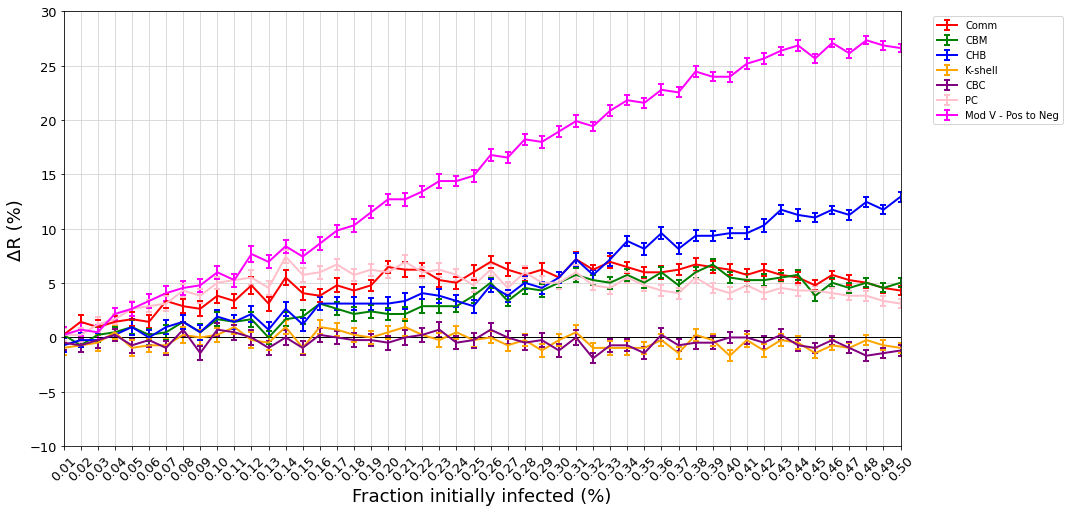

In [82]:
# Caluclate the mean of datasets
Mean_A=deltaR_original_vs_com
Mean_B=deltaR_original_vs_cbm
Mean_C=deltaR_original_vs_chb
Mean_D=deltaR_original_vs_kshell
Mean_E=deltaR_original_vs_cbc
Mean_F=deltaR_original_vs_pc
Mean_G=deltaR_original_vs_modv


# Create a figure with customized size
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

# Line color for error bar
color_A = 'red'
color_B = 'green'
color_C = 'blue'
color_D = 'orange'
color_E = 'purple'
color_F = 'pink'
color_G = 'fuchsia'
color_H = 'black'
color_I = 'aqua'

# Set the axis lables
ax.set_xlabel('Fraction initially infected (%)', fontsize = 18)
ax.set_ylabel('ΔR (%)', fontsize = 18)

xaxis = fraction

# Line style for each dataset
lineStyle_A={"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":3}

# Create an error bar for each dataset
line_A=ax.errorbar(xaxis, Mean_A,yerr=deltaR_stdv_original_vs_com,**lineStyle_A, color=color_A, label='Comm')
line_B=ax.errorbar(xaxis, Mean_B,yerr=deltaR_stdv_original_vs_cbm,**lineStyle_A, color=color_B, label='CBM')
line_C=ax.errorbar(xaxis, Mean_C,yerr=deltaR_stdv_original_vs_chb,**lineStyle_A, color=color_C, label='CHB')
line_D=ax.errorbar(xaxis, Mean_D,yerr=deltaR_stdv_original_vs_kshell,**lineStyle_A, color=color_D, label='K-shell')
line_E=ax.errorbar(xaxis, Mean_E,yerr=deltaR_stdv_original_vs_cbc,**lineStyle_A, color=color_E, label='CBC')
line_F=ax.errorbar(xaxis, Mean_F,yerr=deltaR_stdv_original_vs_pc,**lineStyle_A, color=color_F, label='PC')
line_G=ax.errorbar(xaxis, Mean_G,yerr=deltaR_stdv_original_vs_modv,**lineStyle_A, color=color_G, label='Mod V - Pos to Neg')

ax.margins(x=0)

              
# Draw a legend bar
plt.legend(handles=[line_A, line_B, line_C, line_D, line_E, line_F, line_G],  bbox_to_anchor=(1.2, 1))

# Customize the tickes on the graph
plt.xticks(xaxis)               
plt.xticks(rotation = 45) 
ax.set_ylim([-10,30])
ax.axhline(0, color = 'black', linewidth=1)
              
# Draw a grid for the graph
ax.grid(color='lightgrey', linestyle='-')
ax.set_facecolor('w')
plt.tick_params(labelsize=13)